<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Churn-Prediction-IBM-telco/blob/main/EDA_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_excel('Eda_data.xlsx')
print(df.head())

        State         City  Zip Code   Latitude   Longitude  Gender  \
0  California  Los Angeles     90003  33.964131 -118.272783    Male   
1  California  Los Angeles     90005  34.059281 -118.307420  Female   
2  California  Los Angeles     90006  34.048013 -118.293953  Female   
3  California  Los Angeles     90010  34.062125 -118.315709  Female   
4  California  Los Angeles     90015  34.039224 -118.266293    Male   

  Senior Citizen Partner Dependents  Tenure Months  ... Tech Support  \
0             No      No         No              2  ...           No   
1             No      No        Yes              2  ...           No   
2             No      No        Yes              8  ...           No   
3             No     Yes        Yes             28  ...          Yes   
4             No      No        Yes             49  ...           No   

  Streaming TV Streaming Movies        Contract Paperless Billing  \
0           No               No  Month-to-month               Yes   
1 

Lets take a Look at the total churn count among 7032 customers

Churn Label
No     5163
Yes    1869
Name: count, dtype: int64


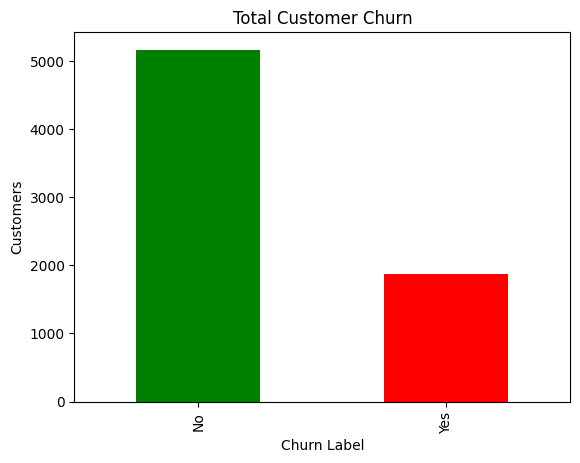

In [11]:
df['Churn Label'].value_counts().plot(kind='bar',color=['green','red'])
plt.title('Total Customer Churn')
plt.xlabel('Churn Label')
plt.ylabel('Customers')
print(df['Churn Label'].value_counts())

WHen we analyze the ratio fo churn with respect to gender we can see that the gender of customer doesnt have any particular significannce in causing churn

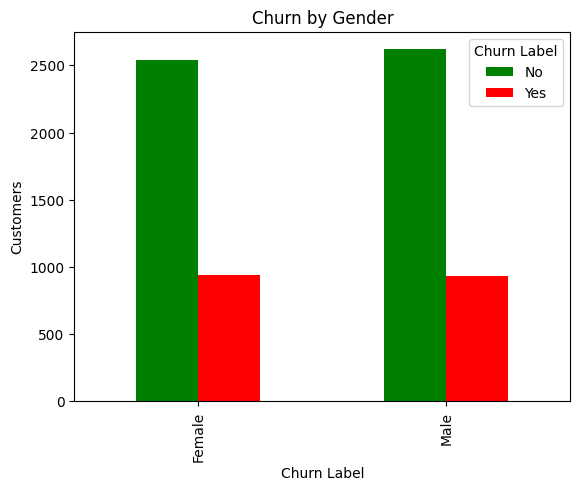

Percentage of Churn by female customers: 26.959517657192077
Percentage of Churn by male customers: 26.204564666103124


In [12]:
churn_by_gender=pd.crosstab(df["Gender"],df["Churn Label"])
female=churn_by_gender.loc['Female','No']
male=churn_by_gender.loc['Male','No']
female_churn=churn_by_gender.loc['Female','Yes']
male_churn=churn_by_gender.loc['Male','Yes']
female_churn=(female_churn/(female_churn+female))*100
male_churn=(male_churn/(male_churn+male))*100

churn_by_gender.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Gender')
plt.xlabel('Churn Label')
plt.ylabel('Customers')
plt.show()
print(f"Percentage of Churn by female customers: {female_churn}")
print(f"Percentage of Churn by male customers: {male_churn}")

When we compare customer churn to ratio  of senior citizens, we can observe that senior citizens are more inclined towards churning as compared to younger customers

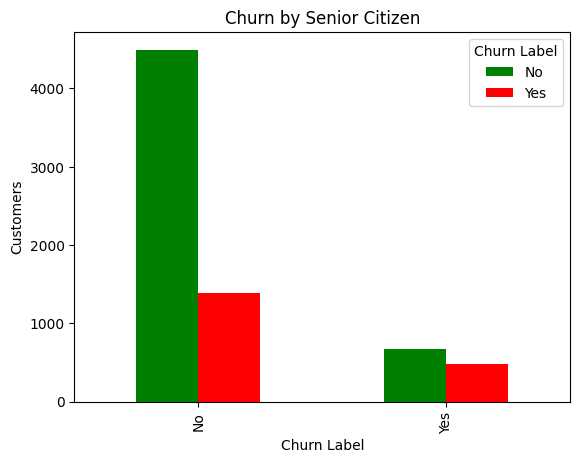

Percentage of Churn by Senior Citizen customers: 41.68126094570928
Percentage of Churn by Non Senior Citizen customers: 23.65025466893039


In [13]:
churn_by_sc=pd.crosstab(df["Senior Citizen"],df["Churn Label"])
sc_churn=churn_by_sc.loc['Yes','Yes']
non_sc_churn=churn_by_sc.loc['No','Yes']
sc=churn_by_sc.loc['Yes','No']
non_sc=churn_by_sc.loc['No','No']
sc_churn=(sc_churn/(sc+sc_churn))*100
non_sc_churn=(non_sc_churn/(non_sc_churn+non_sc))*100
churn_by_sc.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Senior Citizen')
plt.xlabel('Churn Label')
plt.ylabel('Customers')
plt.show()
print(f"Percentage of Churn by Senior Citizen customers: {sc_churn}")
print(f"Percentage of Churn by Non Senior Citizen customers: {non_sc_churn}")

This vizulaization shows us that most of the customers  become churners just after a month which caues low monthky charges and low total charges

 we also see that amost 55%  our customer  play around 50 to 100
 with 20% of customers opting for the basic tier packages
  

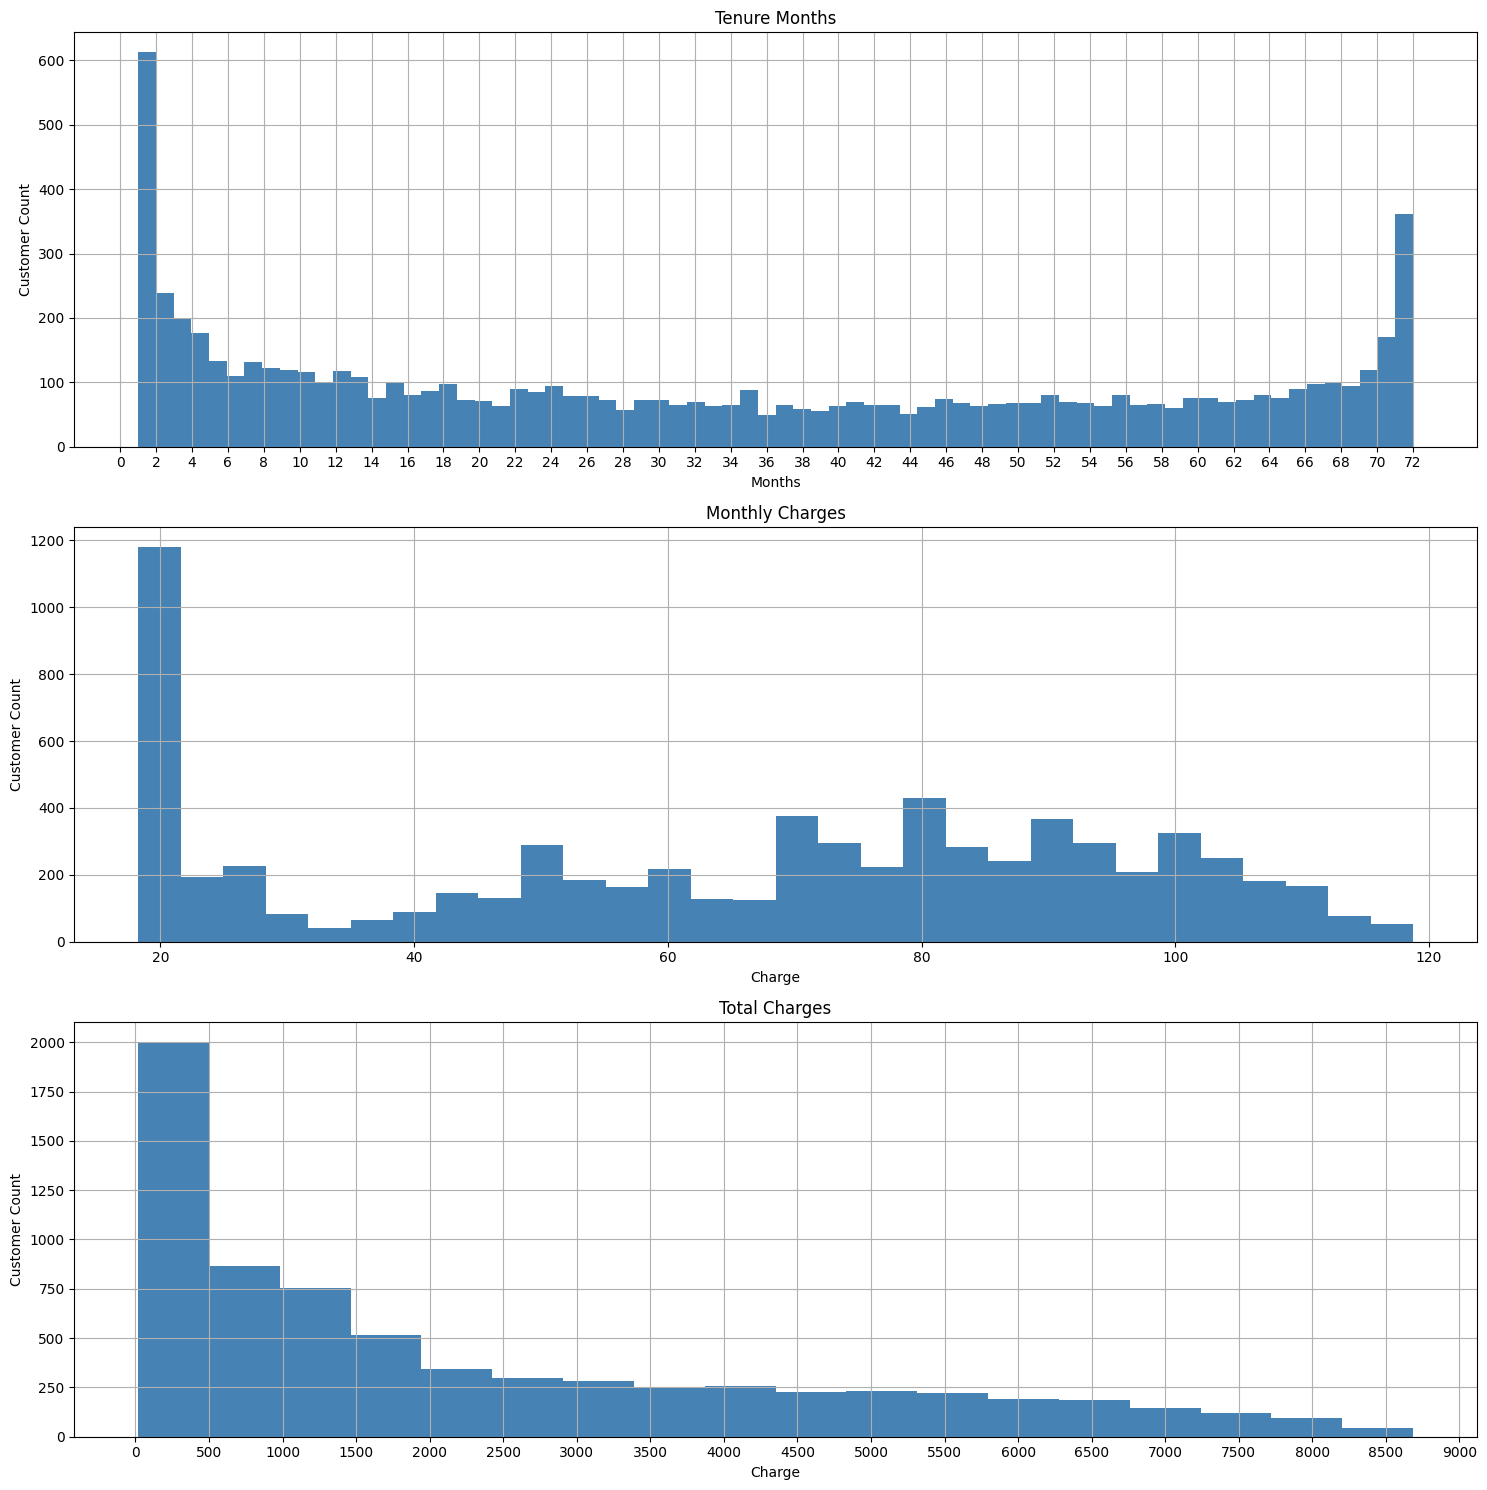

Monthly Charges
(0, 25]       19.937429
(25, 50]      12.670648
(50, 75]      23.037543
(75, 100]     31.527304
(100, 125]    12.827076
Name: proportion, dtype: float64


In [14]:
fig,axes= plt.subplots(3,1, figsize=(30,30))
df['Tenure Months'].hist(bins=72,figsize=(15,15),color='steelblue',ax=axes[0])
axes[0].set_title('Tenure Months')
axes[0].set_xticks(range(0,74,2))
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Customer Count')
df['Monthly Charges'].hist(bins=30,figsize=(15,15),color='steelblue',ax=axes[1])
axes[1].set_title('Monthly Charges')
axes[1].set_xlabel('Charge')
axes[1].set_ylabel('Customer Count')
df['Total Charges'].hist(bins=18,figsize=(15,15),color='steelblue',ax=axes[2])
axes[2].set_title('Total Charges')
axes[2].set_xticks(range(0,9500,500))
axes[2].set_xlabel('Charge')
axes[2].set_ylabel('Customer Count')
plt.tight_layout()
plt.show()
bin_percent_mc=pd.cut(df["Monthly Charges"],bins=range(0,140,25)).value_counts(normalize=True).sort_index()*100
print(bin_percent_mc)


The LOWESS regression line for churned customers rises more sharply than for non-churned customers, especially in the early tenure range. This indicates that customers who experience rapid increases in monthly charges or who start with high plans upfront are more likely to churn, supporting the idea that jump like pricing behavior contributes to early churn.


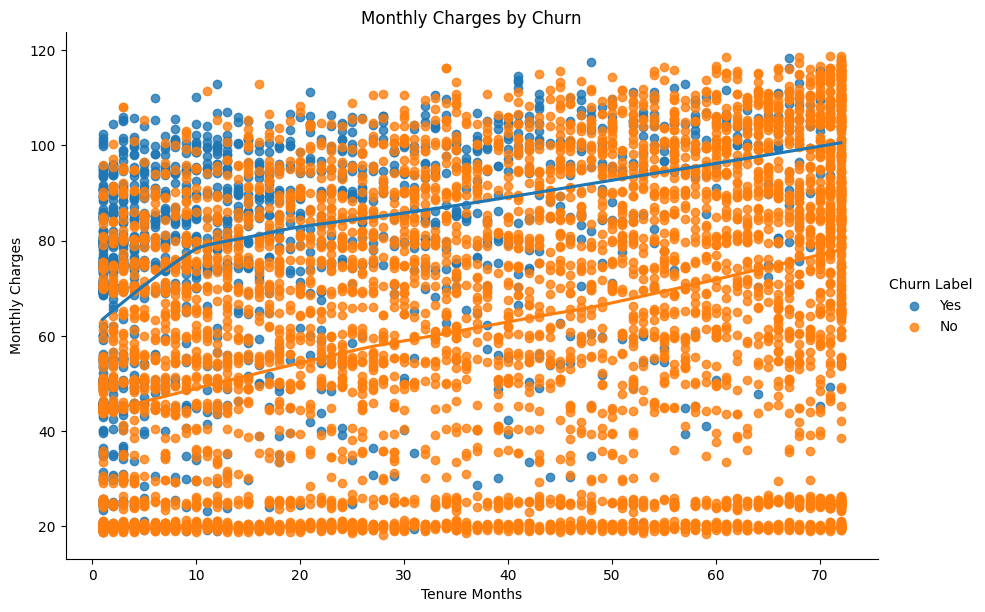

In [15]:
sns.lmplot(data=df,x='Tenure Months', y='Monthly Charges',hue='Churn Label',lowess=True, height=6, aspect=1.5)
plt.title('Monthly Charges by Churn')
plt.show()


when we compare churn rate to contract tyoe we find the  customer with month to month type contract were more likely to churn than other long term plans


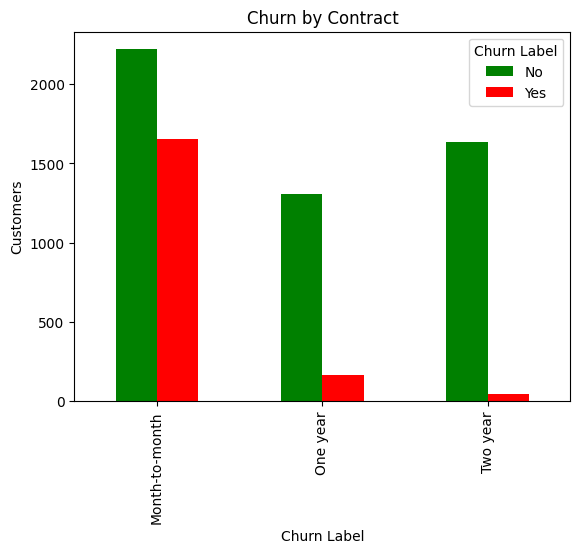

Churn Label       No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48
Percentage of Churn by Month to Month customers: 42.70967741935484
Percentage of Churn by One Year customers: 11.277173913043478
Percentage of Churn by Two Year customers: 2.8486646884272995


In [22]:
churn_by_contract= pd.crosstab(df['Contract'],df['Churn Label'])
churn_by_contract.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Contract')
plt.xlabel('Churn Label')
plt.ylabel('Customers')
plt.show()
print(churn_by_contract)

mtm=churn_by_contract.loc['Month-to-month','No']
churn_mtm=churn_by_contract.loc['Month-to-month','Yes']
churn_mtm=(churn_mtm/(churn_mtm+mtm))*100
print(f"Percentage of Churn by Month to Month customers: {churn_mtm}")

oy_churn=churn_by_contract.loc['One year','Yes']
oy=churn_by_contract.loc['One year','No']
oy_churn=(oy_churn/(oy_churn+oy))*100
print(f"Percentage of Churn by One Year customers: {oy_churn}")

tw_churn=churn_by_contract.loc['Two year','Yes']
tw=churn_by_contract.loc['Two year','No']
tw_churn=(tw_churn/(tw_churn+tw))*100
print(f"Percentage of Churn by Two Year customers: {tw_churn}")



customers with Fiber Optio Internet Service type showed significantly more churn as compared too  customers with DSL or no internet services


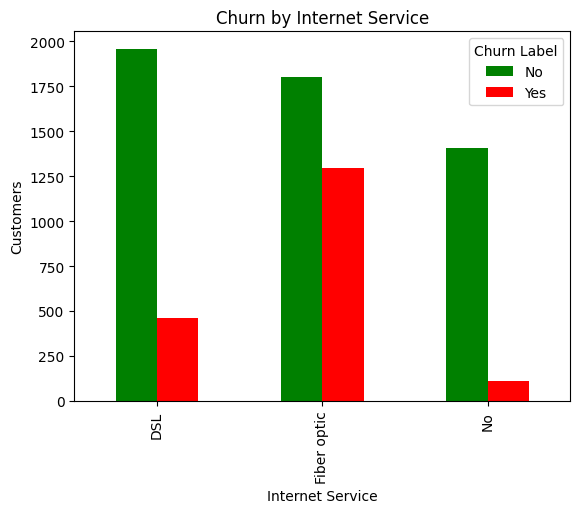

Churn Label         No   Yes
Internet Service            
DSL               1957   459
Fiber optic       1799  1297
No                1407   113
Percentage of Churn by Fiber Optic customers: 42.70967741935484
Percentage of Churn by DSL customers: 11.277173913043478
Percentage of Churn by Two Year customers: 2.8486646884272995


In [29]:
churn_by_IS= pd.crosstab(df['Internet Service'],df['Churn Label'])
churn_by_IS.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Customers')
plt.show()
print(churn_by_IS)

fb=churn_by_IS.loc['Fiber optic','No']
churn_fb=churn_by_IS.loc['Fiber optic','Yes']
churn_fb=(churn_mtm/(churn_mtm+mtm))*100
print(f"Percentage of Churn by Fiber Optic customers: {churn_mtm}")

ds_churn=churn_by_IS.loc['DSL','Yes']
ds=churn_by_IS.loc['DSL','No']
ds_churn=(ds_churn/(ds_churn+ds))*100
print(f"Percentage of Churn by DSL customers: {oy_churn}")

no_is_churn=churn_by_IS.loc['No','Yes']
no_is=churn_by_IS.loc['No','No']
no_is_churn=(no_is_churn/(no_is_churn+no_is))*100
print(f"Percentage of Churn by Two Year customers: {tw_churn}")



As we can see that the signifcant amount of churn occurs in ther 1st two years but what the most important thing to see here is that the  about 12 % of all the churn occured in the 1st month alone

<Axes: xlabel='tenure Groups3'>

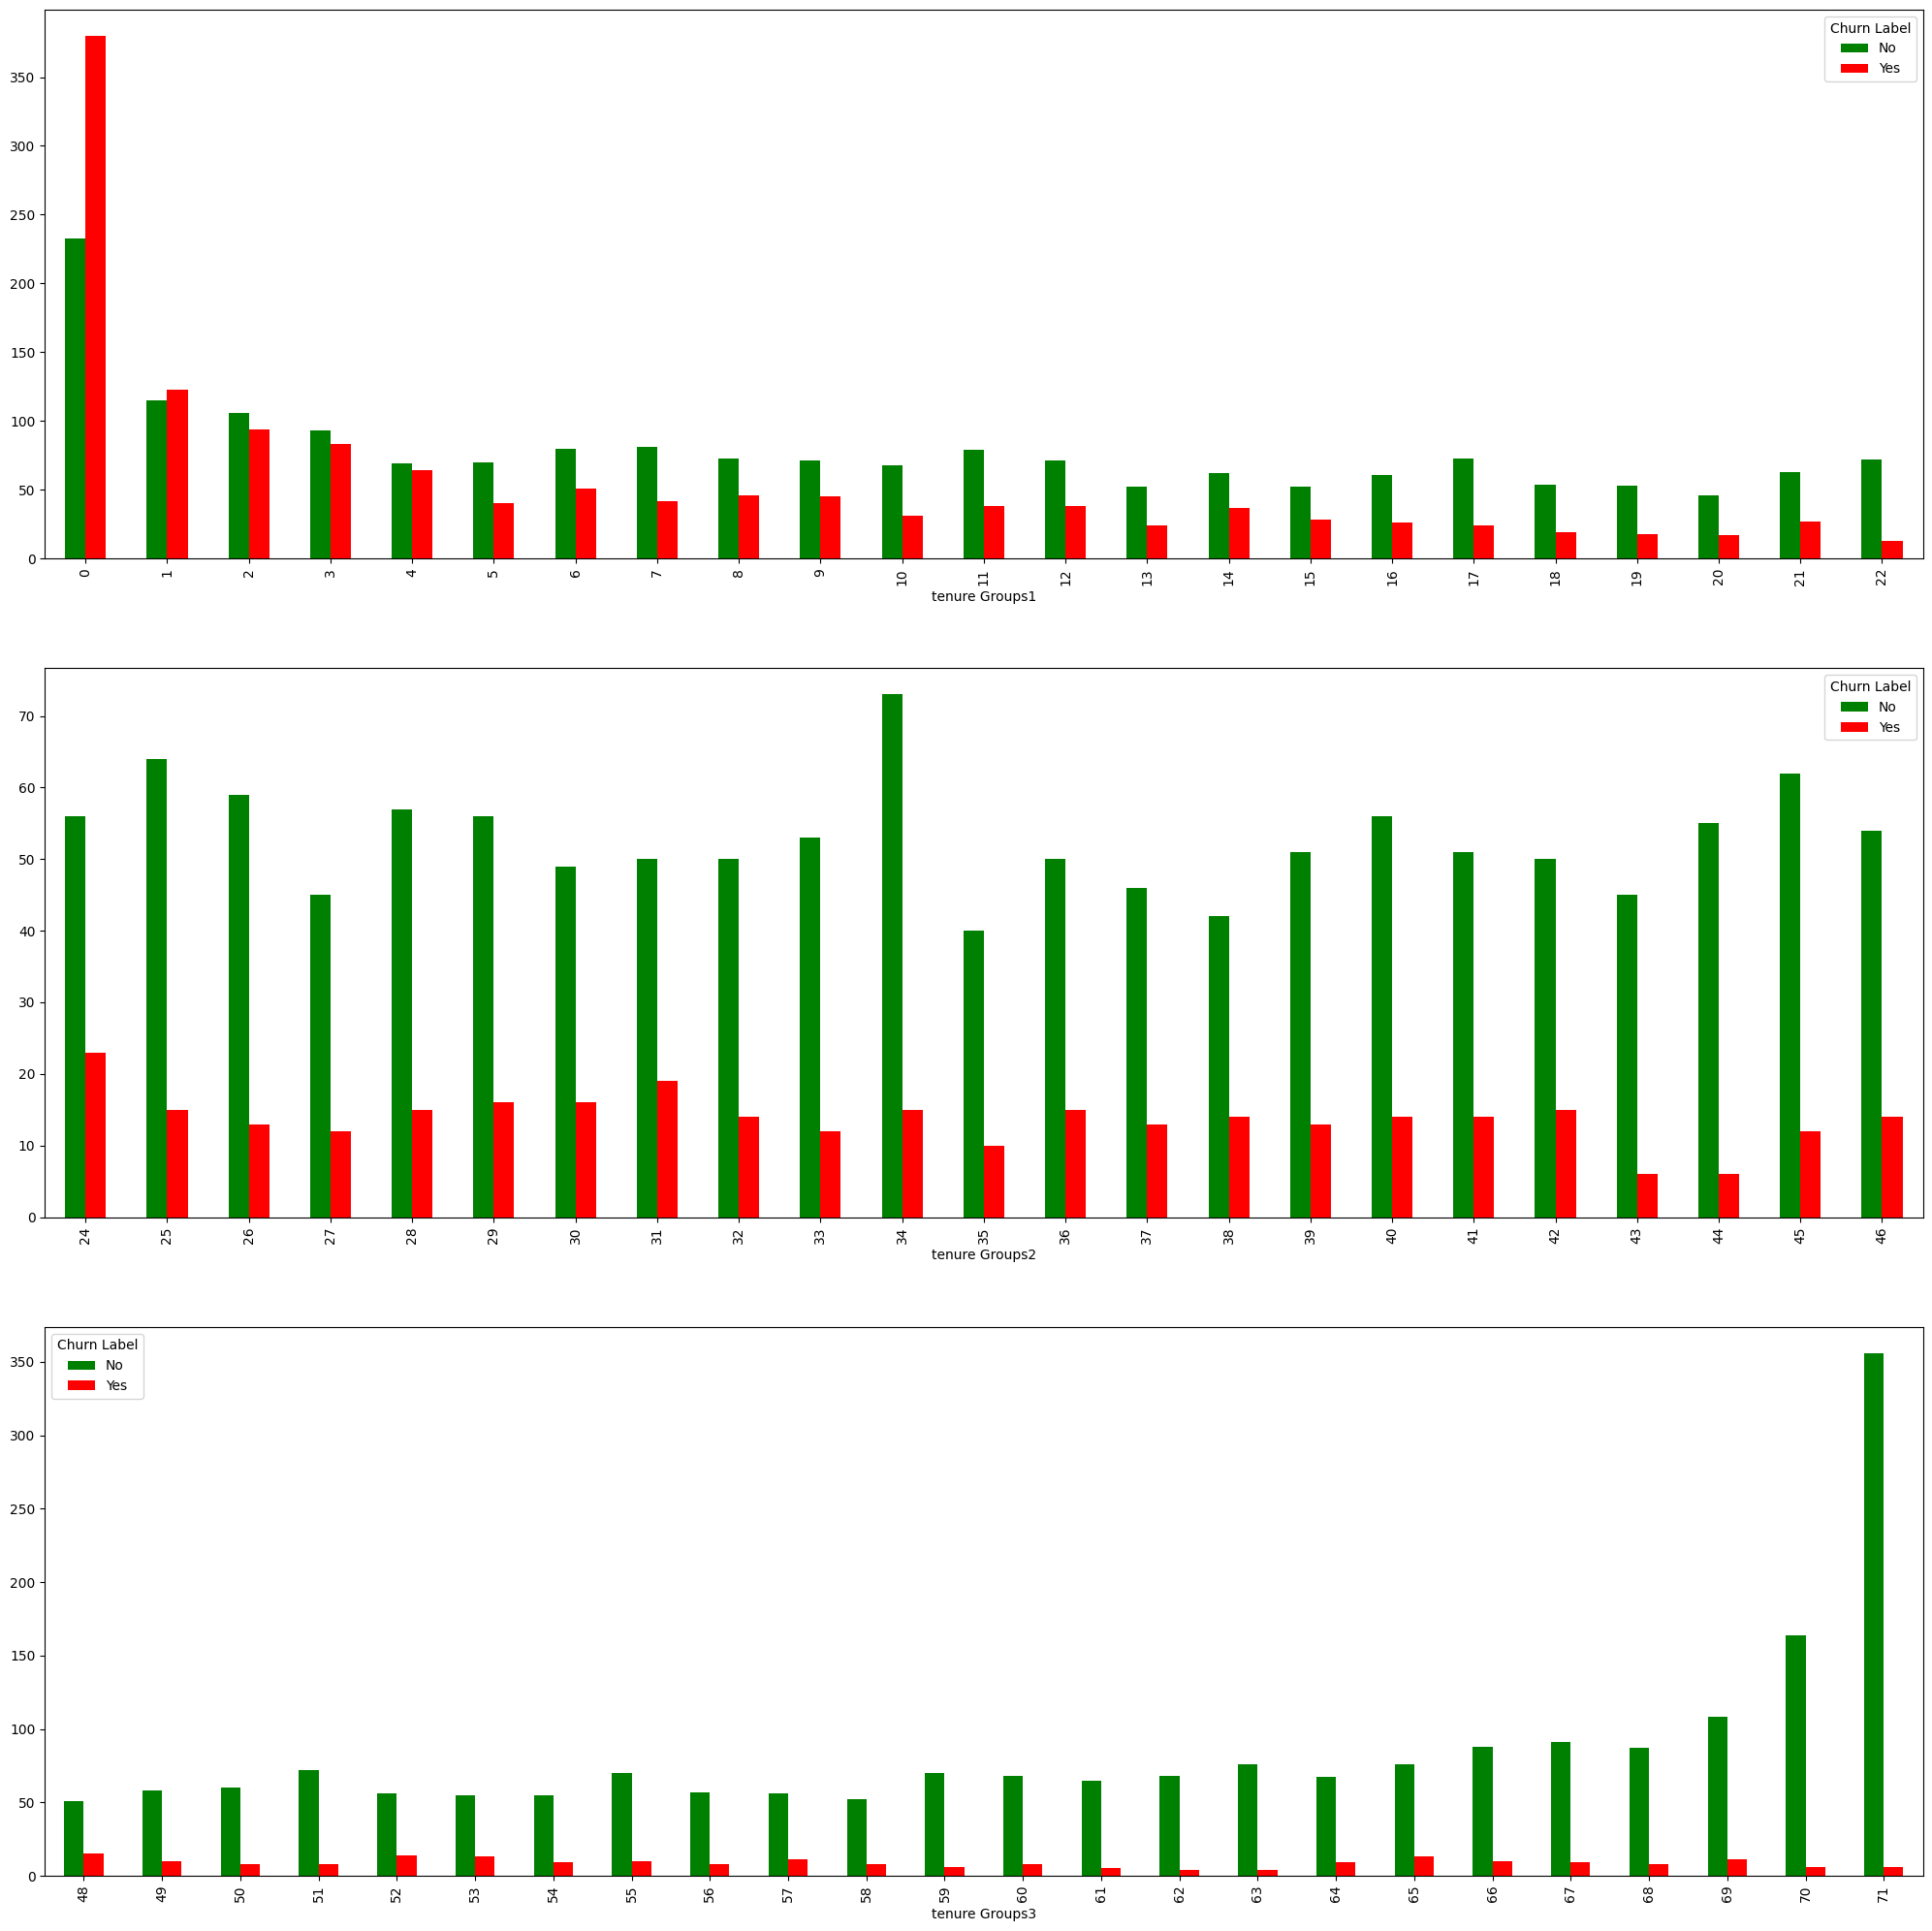

In [57]:
fig,axes= plt.subplots(3,1,figsize=(25,25))
df['tenure Groups1']=pd.cut(df['Tenure Months'],bins=range(0,24,1),labels=range(0,23,1))
df['tenure Groups2']=pd.cut(df['Tenure Months'],bins=range(24,48,1),labels=range(24,47,1))
df['tenure Groups3']=pd.cut(df['Tenure Months'],bins=range(48,74,1),labels=range(48,73,1))

churn_by_tenure=pd.crosstab(df['tenure Groups1'],df['Churn Label'])
churn_by_tenure.plot(kind='bar',stacked=False,color=['green','red'],ax=axes[0])
churn_by_tenure2=pd.crosstab(df['tenure Groups2'],df['Churn Label'])
churn_by_tenure2.plot(kind='bar',stacked=False,color=['green','red'],ax=axes[1])

churn_by_tenure3=pd.crosstab(df['tenure Groups3'],df['Churn Label'])
churn_by_tenure3.plot(kind='bar',stacked=False,color=['green','red'],ax=axes[2])

In [64]:
churn_by_1st_month=churn_by_tenure.iloc[0,0]
churn_by_1st_month= (churn_by_1st_month/df['Churn Label'].value_counts()[1])*100
print(f"Percentage of Churn by 1st month customers: {churn_by_1st_month}")

Percentage of Churn by 1st month customers: 12.466559657570892


<ipython-input-64-0e66a32c3bb2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_by_1st_month= (churn_by_1st_month/df['Churn Label'].value_counts()[1])*100


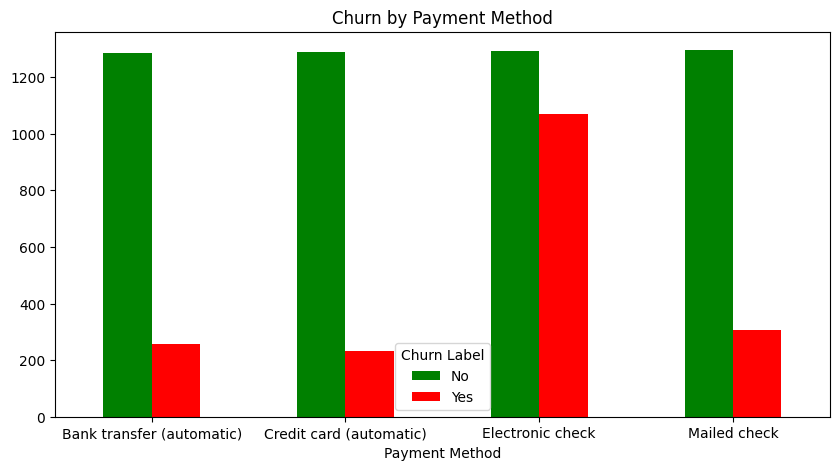

In [73]:
pd.crosstab(df['Payment Method'], df['Churn Label']).plot(kind='bar', color=['green', 'red'], figsize=(10, 5))
plt.title('Churn by Payment Method')
plt.xticks(rotation=360)
plt.show()
